# Mood-Based Playlist Generator: A Music Recommendation System

* Build a playlist recommendation system that suggests songs based on mood categories
* Use clustering models to group songs by mood, leveraging acoustic features (valence, energy, tempo).
* Personalize playlists by allowing users to input their mood, and get dynamic song recommendations.

# Business Understanding

# Data Understanding

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from textblob import TextBlob
import ipywidgets as widgets
from IPython.display import display

In [4]:
df=pd.read_csv('./data.csv')
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [13]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [36]:
df.shape

(2017, 19)

In [38]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,Cluster,Mood_Cluster
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702,1.755578,1.290530
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091,1.127422,1.363816
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000,0.000000,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000,1.000000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000,2.000000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000,2.000000,2.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000,4.000000,4.000000


# Data Preparation

* Clean and normalize acoustic features like valence, energy, tempo, danceability.
* Use NLP to extract sentiment scores from lyrics — add emotional tone as a feature.
* Encode genres and artist names.

In [14]:
# Select relevant features for clustering
acoustic_features = ['valence', 'energy', 'tempo', 'danceability', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
df_features = df[acoustic_features]

In [16]:
# Handle missing values (simple imputation)
df_features = df_features.fillna(df_features.median())

In [17]:
# Normalize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

## Finding Optimal Number of Clusters

k=2, Inertia=13387.70682184856
k=3, Inertia=11630.827929614214
k=4, Inertia=10304.908283353736
k=5, Inertia=9391.201711613838
k=6, Inertia=8753.022892078972
k=7, Inertia=7799.371747015973
k=8, Inertia=7334.0230576589465
k=9, Inertia=7077.840917122428
k=10, Inertia=6829.573564143782


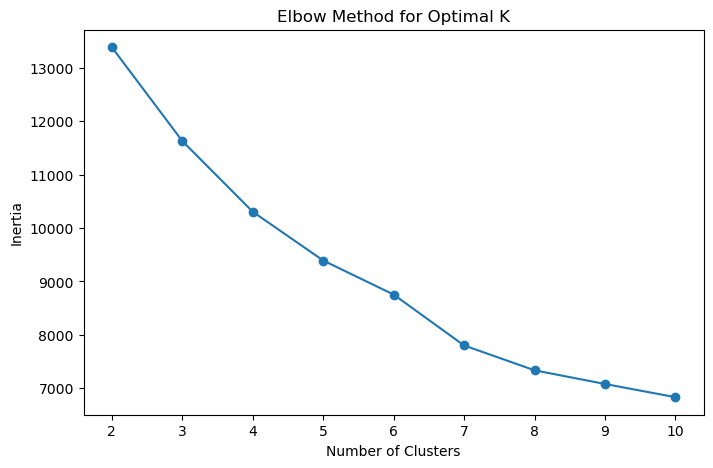

In [26]:
# Determine optimal number of clusters using Elbow method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', algorithm='elkan')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    print(f'k={k}, Inertia={kmeans.inertia_}')  # Print inertia values

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


The elbow is around k=5, because the inertia drop slows down significantly after k=5.
If you want fewer clusters, go with k=4 (simpler, broader mood categories). 5 clusters will give us the best balance between distinct clusters and efficiency.

# K Means Clustering

In [28]:
# Set optimal k
optimal_k = 5

# Train final KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto', algorithm='elkan')

# Assign clusters
df["Mood_Cluster"] = kmeans.fit_predict(df_scaled)

In [29]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,Cluster,Mood_Cluster
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,3,2
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,1,0
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,3,2
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,4,3
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,0,4


In [30]:
# How many songs fall into each cluster?
print(df['Mood_Cluster'].value_counts())

Mood_Cluster
0    753
1    605
4    234
2    213
3    212
Name: count, dtype: int64


In [35]:
# Ensure Mood_Cluster is numeric
df['Mood_Cluster'] = df['Mood_Cluster'].astype(int)

# Select only numeric columns for mean calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Extract numeric columns
numeric_cols = numeric_cols[numeric_cols != "Mood_Cluster"]  # Exclude Mood_Cluster itself

# Compute the mean for each cluster using only numeric features
cluster_means = df.groupby('Mood_Cluster')[numeric_cols].mean()

# Display the results
cluster_means

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,Cluster
Mood_Cluster,,,,,,,,,,,,,,,,
0,983.816733,0.146641,0.726382,246905.395750,0.714007,0.099735,5.269588,0.144131,-6.671064,0.608234,0.068427,114.135134,4.000000,0.696190,0.533865,0.930943
1,1044.515702,0.087880,0.535570,241522.342149,0.723104,0.120022,5.507438,0.144842,-6.140392,0.595041,0.063331,132.291529,3.965289,0.346119,0.461157,1.715702
2,800.323944,0.172601,0.692596,228922.314554,0.665108,0.015983,5.431925,0.181147,-6.974958,0.572770,0.306535,124.247418,4.018779,0.524518,0.723005,2.924883
3,1241.382075,0.778208,0.485509,278376.207547,0.283189,0.313658,4.731132,0.149747,-13.417528,0.712264,0.041116,111.289642,3.787736,0.256527,0.301887,3.905660
4,969.008547,0.055713,0.538120,243515.431624,0.845778,0.218901,5.623932,0.506162,-5.227667,0.615385,0.098524,124.938308,3.991453,0.437338,0.517094,1.500000


Feature	High Values Mean...	Low Values Mean...
Valence (0-1)	Happy, cheerful, uplifting	Sad, melancholic
Energy (0-1)	Loud, fast, energetic	Soft, slow, relaxed
Tempo (BPM)	Fast-paced	Slow, chill
Danceability (0-1)	Easy to dance to	Hard to dance to
Acousticness	Acoustic, unplugged feel	Electronic, heavily produced
Liveness	Live performance	Studio recording

In [40]:
# Manually label clusters based on analysis
mood_labels = {
    0: "Feel Good",
    1: "Workout Pump",
    2: "Calm Cool Collected",
    3: "In my Feels",
    4: "Hype Party"
}

# Add the mood label to the dataset
df["Mood_Label"] = df["Mood_Cluster"].map(mood_labels)

# Show a preview
df[["song_title", "artist", "Mood_Cluster", "Mood_Label"]].head()

,song_title,artist,Mood_Cluster,Mood_Label
0,Mask Off,Future,2,Calm Cool Collected
1,Redbone,Childish Gambino,0,Feel Good
2,Xanny Family,Future,2,Calm Cool Collected
3,Master Of None,Beach House,3,In my Feels
4,Parallel Lines,Junior Boys,4,Hype Party


In [45]:
for cluster in sorted(df["Mood_Cluster"].unique()):
    print(f"\n Mood Cluster {cluster} – {mood_labels[cluster]}")
    display(df[df["Mood_Cluster"] == cluster][["song_title", "artist"]].sample(5))


 Mood Cluster 0 – Feel Good


,song_title,artist
1151,No Promises (feat. Demi Lovato),Cheat Codes
686,L'Amour Parfait,Yelle
1906,No Scrubs,TLC
648,Half Full Glass of Wine,Tame Impala
518,The Perfect Kiss,New Order



 Mood Cluster 1 – Workout Pump


,song_title,artist
561,Love Sosa,Chief Keef
1948,Earth Song - Remastered Version,Michael Jackson
1619,Raven,John Dahlbäck
320,Acamar,Frankey
1319,Permanent Intoxication,Mycelia



 Mood Cluster 2 – Calm Cool Collected


,song_title,artist
81,Aquafina (feat. GoldLink & Chaz French),Falcons
991,F**kin' Problems,A$AP Rocky
758,Latino & Proud,DJ Raff
1014,And Dat (Ft. Stormzy),Bonkaz
1154,Good Life (with G-Eazy & Kehlani),G-Eazy



 Mood Cluster 3 – In my Feels


,song_title,artist
927,Episode I - Duel of The Fates,John Williams
1876,"Nocturne No.1 In B Flat Minor, Op.9 No.1",Frédéric Chopin
1037,Speak to a Girl,Tim McGraw
1550,Angel Eyes,"Tommy Flanagan, Ron Carter & Tony Williams"
1548,Autumn Nocturne,Lou Donaldson



 Mood Cluster 4 – Hype Party


,song_title,artist
916,You Are the Right One,Sports
1131,My Songs Know What You Did In The Dark (Light ...,Fall Out Boy
716,Primetime (feat. Miguel),Janelle Monáe
1338,Bastard Son,God Of Nothing
819,Southern Man - Live,"Crosby, Stills, Nash & Young"


# Evaluation

# Recommendations

# Conclusion

Actionable Insights:
For streaming platforms: Suggest creating mood-based playlists for improved user engagement.
For artists: Identify mood trends — what emotional tones are dominating popular playlists?